## Project 2 - Task 3 (IoTA Fall 2016)
### Multiple Regression Analysis
#### student_id : *avshirod*

In [5]:
# Required Imports
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import linear_model
import scipy.stats as stats
import os

In [6]:
filename = 'p2.csv'
data = pd.read_csv(filename)
header = list(data.columns.values)

dirpath = os.getcwd() + "/task3"
res_filename = dirpath + "/task3.txt"
plot_path = dirpath + "/plots"

# op = open(res_filename, 'w')
# op.write("Y \t Intercept (a0) \t s^2 (a0) \t p_val (a0) \t X_i (a1) \t s^2 (a1) \t p_val (a1) \t R^2 \t F value \t p_val (F) \n")

In [7]:
# Multiple regression on all independent variables: Y ~ X1, X2, X3, X4, X5
y = data[['Y']]
x = data[header[:-1]]
x = sm.add_constant(x)
model1 = sm.OLS(y,x).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     465.5
Date:                Wed, 19 Oct 2016   Prob (F-statistic):          2.63e-184
Time:                        22:59:08   Log-Likelihood:                -2402.1
No. Observations:                 500   AIC:                             4816.
Df Residuals:                     494   BIC:                             4842.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -5.3677      7.132     -0.753      0.4

From the above regression results,

By looking at p-values of the dependent variables, we observe that:

Except **X3** *(p-value : 0.114 >> 0.05)*, every other variable has a **p-value < 0.05**.

Hence, we'll test out a model without X3 in it in next step.

In [20]:
# Multiple regression on independent variables without X3: Y ~ X1, X2, X4, X5
y = data[['Y']]
x1245 = data[['X1', 'X2', 'X4', 'X5']]
x1245 = sm.add_constant(x1245)
model2 = sm.OLS(y,x1245).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     579.5
Date:                Wed, 19 Oct 2016   Prob (F-statistic):          3.57e-185
Time:                        23:10:41   Log-Likelihood:                -2403.4
No. Observations:                 500   AIC:                             4817.
Df Residuals:                     495   BIC:                             4838.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -1.6108      6.735     -0.239      0.8

Above results seem normal, and the *p-values* are well below the threshold.

Let's take a look at the correlation matrix.

In [11]:
# Correlation matrix
corr_mat = pd.DataFrame.corr(data, method='pearson')
print(corr_mat)
print("\nCorrelation Matrix with Significant Correlation")
print(corr_mat[abs(corr_mat) > 0.5])

          X1        X2        X3        X4        X5         Y
X1  1.000000 -0.014324 -0.113998 -0.009826  0.748331  0.864453
X2 -0.014324  1.000000 -0.045013 -0.792724 -0.024899  0.022098
X3 -0.113998 -0.045013  1.000000 -0.034855 -0.087973 -0.077394
X4 -0.009826 -0.792724 -0.034855  1.000000  0.018821 -0.003260
X5  0.748331 -0.024899 -0.087973  0.018821  1.000000  0.826421
Y   0.864453  0.022098 -0.077394 -0.003260  0.826421  1.000000

Correlation Matrix with Significant Correlation
          X1        X2   X3        X4        X5         Y
X1  1.000000       NaN  NaN       NaN  0.748331  0.864453
X2       NaN  1.000000  NaN -0.792724       NaN       NaN
X3       NaN       NaN  1.0       NaN       NaN       NaN
X4       NaN -0.792724  NaN  1.000000       NaN       NaN
X5  0.748331       NaN  NaN       NaN  1.000000  0.826421
Y   0.864453       NaN  NaN       NaN  0.826421  1.000000


Looking at the correlation matrix, we observe that there is high positive correlation between **X1** and **X5**, and a high negative correlation between **X2** and **X4**.

###### Decide which independent variables should be left out

Based on above matrix, we should leave out one independent variable out of **X1** and **X5**, and one from **X2** and **X4**.

As **Y** observes high correlation with **X1** and **X2** (over **X5** and **X4** resp), we choose to keep those two and compare results with previous analysis.

In [35]:
# Multiple regression on independent variables without X3, X4, X5: Y ~ X1, X2
y = data[['Y']]
x12 = data[['X1', 'X2']]
x12 = sm.add_constant(x12)
# model3 = smf.ols('Y ~ X1 + X2', data = data).fit()
model3 = sm.OLS(y,x12).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     739.4
Date:                Wed, 19 Oct 2016   Prob (F-statistic):          1.12e-149
Time:                        23:18:35   Log-Likelihood:                -2492.7
No. Observations:                 500   AIC:                             4991.
Df Residuals:                     497   BIC:                             5004.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -9.5217      4.810     -1.979      0.0

The above model (with **X1** and **X2**) does not improve the model.

After experimenting around with various combinations (X1 and X4, X1 and X5, X2 and X5), we observe that having **X1** and **X5** in the model gives the best results.

In [53]:
y = data[['Y']]
x15 = data[['X1','X5']]
x15 = sm.add_constant(x15)
model_final = sm.OLS(y,x15).fit()
print(model_final.summary())

print("/nY = {} + {} * {} + {} * {}".format(model_final.params[0], model_final.params[1], 'X1', model_final.params[2], 'X5'))
print("sigma^2 = {}".format(model_final.mse_total))
print("R^2 = {}".format(model_final.rsquared))
print("F-value = {}".format(model_final.fvalue))

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     1136.
Date:                Wed, 19 Oct 2016   Prob (F-statistic):          4.16e-186
Time:                        23:25:34   Log-Likelihood:                -2408.3
No. Observations:                 500   AIC:                             4823.
Df Residuals:                     497   BIC:                             4835.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         16.1094      3.352      4.806      0.0

##### Multiple Regression Analysis Results

Even though both **X1** and **X5** have a certain positive correlation, having them both gives best results over other possible combinations of variables.

- p-value

The p-value for both variables are 0.00, hence they affect the prediction of **Y**.

- R^2 value

Both **R^2** and **Adj R^2** values are higher than other combinations of variables.
An **R^2** value *> 0.8* indicates a good fit.

- F value

The p-value for the F-test is negligible (close to zero). Hence, the null hypothesis for F-test, that coefficients of the predictor variables are zero is false.

In [55]:
import matplotlib.mlab as mlab
import math

def normal_plot(std_err = 1):
    mu = 0
    variance = std_err
    sigma = math.sqrt(variance)
    x = np.linspace(-3, 3, 100)
    plt.plot(x,mlab.normpdf(x, mu, sigma))
    plt.show()

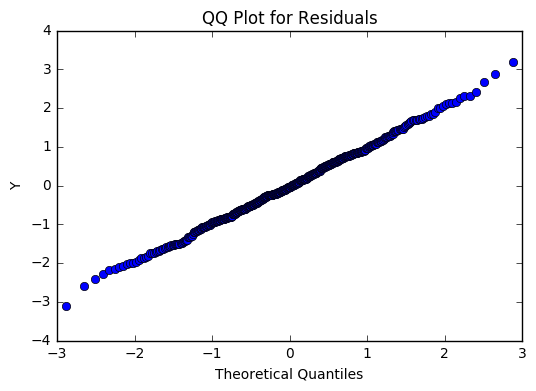

In [62]:
# Q-Q Plot of residuals
result = model_final
residuals = result.resid_pearson
# normal_plot()
qqp = sm.qqplot(residuals, loc=0)
# fig_path_qqplot = plot_path + "/qqplot_" + val
# plt.xlabel(str(val))
plt.ylabel("Y")
plt.title("QQ Plot for Residuals")
plt.show()
# plt.savefig(fig_path_qqplot)
# plt.gcf().clear()

Q-Q plot for residuals is a line, indicating that the residuals are normally distributed.

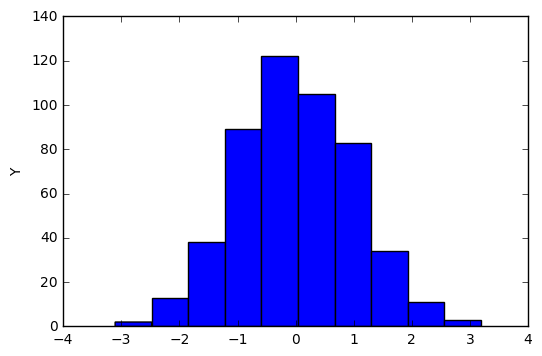

In [63]:
# Histogram of Residuals
plt.hist(list(residuals))
# fig_path_histres = dirpath + "/plots/histres_" + val
# plt.xlabel(str(val))
plt.ylabel("Y")
# plt.title("Histogram for Residuals of " + str(val))
# plt.savefig(fig_path_histres)
plt.show()
plt.gcf().clear()

The histogram for residuals again shows that the residuals are normally distributed around zero (mean = zero), and some small random variance.

In [64]:
# Chi-square for Residuals
chires = stats.chisquare(residuals)
print(chires)

Power_divergenceResult(statistic=-1.4348006505148308e+18, pvalue=1.0)


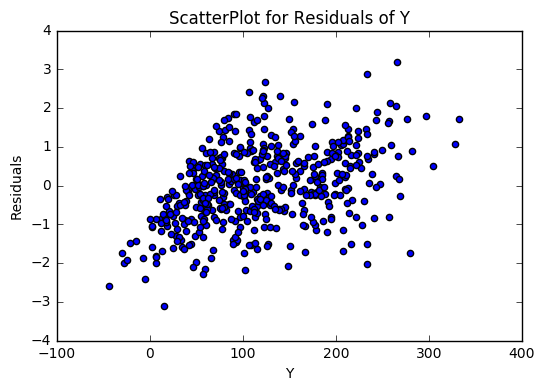

In [75]:
# Scatter plot of residuals
'''
for val in ['X1', 'X5']:
    x1 = data[[val]]
    plt.scatter(list(x1.values.flatten()), list(y.values.flatten()), residuals)
    # fig_path_scatres = dirpath + "/plots/scatres_" + val
    plt.xlabel(str(val))
    plt.ylabel("Y")
    plt.title("ScatterPlot for Residuals of " + str(val))
    # plt.savefig(fig_path_scatres)
    plt.show()
    plt.gcf().clear()
'''

plt.scatter(list(y.values.flatten()),residuals)
plt.title("ScatterPlot for Residuals of Y")
plt.xlabel("Y")
plt.ylabel("Residuals")
plt.show()

From the above scatterplots,
you can see that there is not observable pattern for the residuals of the model.

Hence we say that the model fits the given data well, aka Model is Good.

## Conclusion

For the given data, a polynomial model with independent variables **X1** and **X5** gives the best results.

The statistics for the above combination (R^2, F-value, p-value) back this conclusion.

The graphical analysis of the result and residual analysis also prove the same.